<h2><center> Decision Tree Classifier</center></h2>

In this section, we do a statistical modelling of the data using Decision Tree. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, roc_curve, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

C:\Users\lnp2\AppData\Roaming\Python\Python37\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
# Read the accident data from csv
df_traffic = pd.read_csv('data_wrangled.csv', 
                         index_col = 'Date Of Stop_Time Of Stop',
                         parse_dates = True,
                         infer_datetime_format = True)

df_traffic['V_sage'] = (df_traffic.V_Age - df_traffic.V_Age.min())/\
                  (df_traffic.V_Age.max() - df_traffic.V_Age.min())

not_relevant = ['Latitude', 'Longitude', 'Year', 'Description', 
                'Make', 'Model', 'Color', 'datetime', 'V_Age']
df_traffic.drop(labels = not_relevant, axis = 1,  inplace = True)

In [3]:
# Get X and y from data 
y = df_traffic['Violation Type_Warning']
df_X1 = df_traffic.drop('Violation Type_Warning', axis = 1)
X = df_X1.values

# now,  do a Logistic regression to the data. 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size = 0.5, 
                                    random_state=77)

In [4]:
# Setup the hyperparameter grid 
param_grid = {'max_depth': [39], 
             'min_samples_leaf': np.arange(1,500,2), 
             'min_weight_fraction_leaf': [0], 
             'random_state' : [77], 'class_weight': ['balanced']}

# Instantiate a model
model_tree = DecisionTreeClassifier()

# Instantiate the GridSearchCV object: 
model_cv = RandomizedSearchCV(model_tree, param_grid, 
                              cv = 5, 
                              n_jobs = -1)

# Fit it to the data
model_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(model_cv.best_params_)) 
print("Best score is {}".format(model_cv.best_score_))

Tuned Decision Tree Parameters: {'random_state': 77, 'min_weight_fraction_leaf': 0, 'min_samples_leaf': 159, 'max_depth': 39, 'class_weight': 'balanced'}
Best score is 0.7694535762770517


[[199118  88046]
 [ 48509 265399]]
             precision    recall  f1-score   support

    Citaton       0.80      0.69      0.74    287164
    Warning       0.75      0.85      0.80    313908

avg / total       0.78      0.77      0.77    601072

AUC: 0.8593702304684427


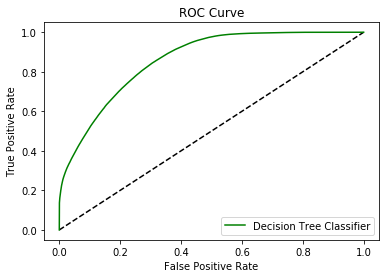

In [5]:
model_tree = DecisionTreeClassifier(max_depth = 39, 
                                    min_weight_fraction_leaf = 0,
                                    min_samples_leaf = 127,
                                    class_weight = 'balanced',
                                    random_state = 77)

model_tree.fit(X_train, y_train)

y_pred = model_tree.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred,  target_names = ['Citaton', 'Warning']))

y_pred_prob = model_tree.predict_proba(X_test)[:,1]

fpr_dt,tpr_dt, thresholds = roc_curve(y_test, y_pred_prob)

print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_dt, tpr_dt, 'g',label = 'Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [6]:
from joblib import dump, load
dump(model_tree, 'Decision_tree.joblib') 

['Decision_tree.joblib']